# World Data League 2021
## Notebook Template

This notebook is one of the mandatory deliverables when you submit your solution (alongside the video pitch). Its structure follows the WDL evaluation criteria and it has dedicated cells where you can add descriptions. Make sure your code is readable as it will be the only technical support the jury will have to evaluate your work.

The notebook must:

*   💻 have all the code that you want the jury to evaluate
*   🧱 follow the predefined structure
*   📄 have markdown descriptions where you find necessary
*   👀 be saved with all the output that you want the jury to see
*   🏃‍♂️ be runnable

**Introduction** 

Describe how you framed the challenge by telling us what problem are you trying to solve and how your solution solves that problem.

## Development
Start coding here! 🐱‍🏍

Don't hesitate to create markdown cells to include descriptions of your work where you see fit, as well as commenting your code.

We know that you know exactly where to start when it comes to crunching data and building models, but don't forget that WDL is all about social impact...so take that into consideration as well.



### Basics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import numpy as np

In [65]:
#setting the figure size for seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})
pd.set_option('display.float_format', lambda x: '%.5f' % x)

#### Data Imports

In [3]:
data_senior = pd.read_csv('raw_data/senior_transportation.csv')
data_bus = pd.read_csv('raw_data/bus_routes.csv')
data_users = pd.read_csv('raw_data/churn_users.csv')
data_od = pd.read_csv('raw_data/churn_OD.csv')

### Data Exploration

#### data_bus

In [4]:
data_bus
#linkid refers to a unique road segment which is originally provided by HERE API, according to the data provider

,IDRoute,linkid
0,1,537277300
1,1,537277673
2,1,537277754
3,1,537277777
4,1,537277795
...,...,...
48307,166,1226896489
48308,166,1226896507
48309,166,1226896508
48310,166,1226896568


In [5]:
data_bus['linkid'].nunique(), data_bus['IDRoute'].nunique() #there are 19277 unique road segments & 166 routes

(19277, 166)

#### data_senior

In [6]:
# data collected between Apr 2019 and March 2020
# date_senior refers to the amount of daily senior population travelling from different counties using various linkid routes
data_senior

,linkid,Region_of_Origin,District_of_Origin,County_of_Origin,Average_Daily_SeniorPopulation_Travelling
0,80216810,R1 - AM Lisboa,Lisboa,Lisboa,2013.681187
1,80216810,R1 - AM Lisboa,Setúbal,Palmela,7688.296396
2,80216810,R1 - AM Lisboa,Lisboa,Oeiras,220.647248
3,80216810,R1 - AM Lisboa,Lisboa,Vila Franca de Xira,233.203075
4,80216812,R1 - AM Lisboa,Lisboa,Lisboa,261.606014
...,...,...,...,...,...
121048,1223824210,R1 - AM Lisboa,Setúbal,Barreiro,1877.243984
121049,1223824210,R1 - AM Lisboa,Setúbal,Palmela,505.273329
121050,1223824211,R1 - AM Lisboa,Setúbal,Palmela,505.273329
121051,1223824211,R1 - AM Lisboa,Setúbal,Barreiro,961.962684


In [7]:
data_senior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121053 entries, 0 to 121052
Data columns (total 5 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   linkid                                     121053 non-null  int64  
 1   Region_of_Origin                           121053 non-null  object 
 2   District_of_Origin                         121053 non-null  object 
 3   County_of_Origin                           121053 non-null  object 
 4   Average_Daily_SeniorPopulation_Travelling  121053 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.6+ MB


In [8]:
data_senior['Average_Daily_SeniorPopulation_Travelling'].describe()

count    121053.000000
mean        729.366014
std        1773.868105
min          20.464702
25%         116.601537
50%         233.203075
75%         577.885650
max       28955.439210
Name: Average_Daily_SeniorPopulation_Travelling, dtype: float64

In [9]:
data_senior['linkid'].nunique() #75041 road segments 

75041

<function matplotlib.pyplot.show(close=None, block=None)>

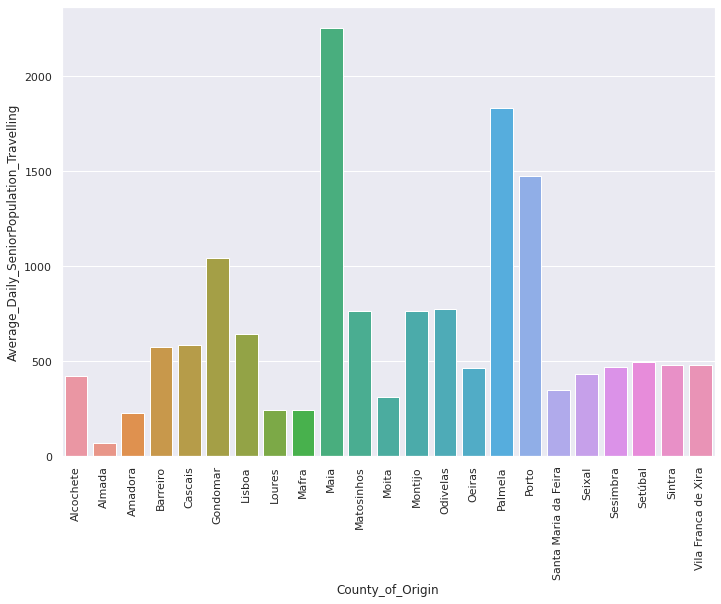

In [57]:
# the graph highlights the average of average daily senior population travelling on different road segments from the same county
# we assume that can highlight / generalize from which counties the seniors that travel the most are from - why ?
# the data_senior includes various means of transportation including foot, cars, buses etc...

data_senior_counties = data_senior[['County_of_Origin', "Average_Daily_SeniorPopulation_Travelling"]].groupby("County_of_Origin").mean()
data_senior_counties.reset_index(inplace=True) #reset index in order to draw barplot
sns.barplot(x = 'County_of_Origin' , y = 'Average_Daily_SeniorPopulation_Travelling' ,data= data_senior_counties)
plt.xticks(rotation='vertical')
plt.show

The data/graph above highlights that seniors from the regions of Maia, Palmela, Porto and Gondomar tend to travel a lot from 
these counties. Around 1000 seniors travel daily. 

In [11]:
list_of_counties = data_senior['County_of_Origin'].unique().tolist() 
list_of_counties
#23 counties focused in the districts of Lisboa, Porto and Setúbal

['Lisboa',
 'Palmela',
 'Oeiras',
 'Vila Franca de Xira',
 'Sintra',
 'Barreiro',
 'Seixal',
 'Almada',
 'Amadora',
 'Mafra',
 'Odivelas',
 'Sesimbra',
 'Maia',
 'Loures',
 'Porto',
 'Gondomar',
 'Setúbal',
 'Cascais',
 'Montijo',
 'Santa Maria da Feira',
 'Matosinhos',
 'Moita',
 'Alcochete']

#### data_users

In [12]:
#bus usage per counties, gender, age and timeframe
data_users.head(15)

,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day
0,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,15-24,294.194206
1,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,25-34,1081.652817
2,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,35-44,235.836653
3,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,45-54,840.951323
4,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,55-64,1216.148092
5,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,15-24,1148.427051
6,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,25-34,421.940180
7,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,35-44,137.697607
8,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,45-54,617.693161
9,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,55-64,867.481913


In [13]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Region_of_Origin          544 non-null    object 
 1   District_of_Origin        544 non-null    object 
 2   County_of_Origin          544 non-null    object 
 3   Period                    544 non-null    object 
 4   GenderDescription         544 non-null    object 
 5   AgeClassDescription       544 non-null    object 
 6   Average_BusUsers_per_Day  544 non-null    float64
dtypes: float64(1), object(6)
memory usage: 29.9+ KB


In [14]:
data_users.describe()

,Average_BusUsers_per_Day
count,544.000000
mean,1165.396638
std,3842.867736
min,5.514983
25%,158.801133
50%,475.677330
75%,990.064295
max,66882.208460


In [15]:
# the dataset is divided between two periods Sep-19 to Feb-20 (pre-covid) & Sep-20 to Jan-21 (during covid)
data_users_pre = data_users[data_users['Period']== 'Sep-19 to Feb-20']
data_users_covid = data_users[data_users['Period']== 'Sep-20 to Jan-21']

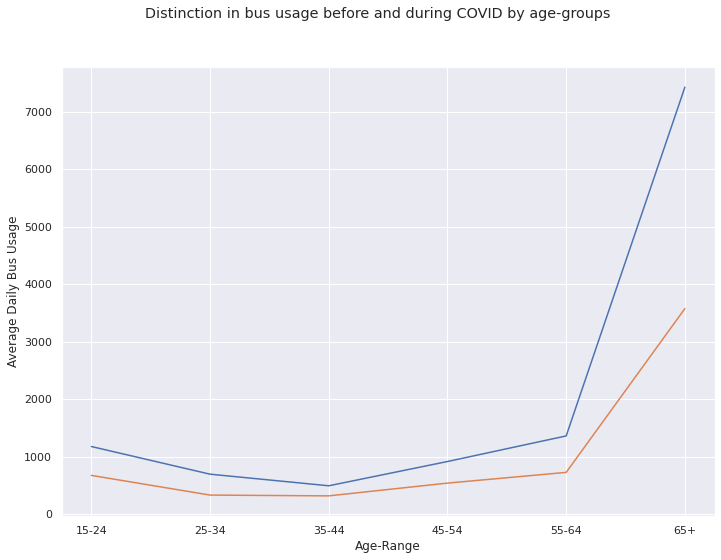

In [16]:
fig = plt.figure()
fig.suptitle('Distinction in bus usage before and during COVID by age-groups')
plt.plot(data_users_pre.groupby("AgeClassDescription").mean()) #there is an average of 7'000 daily bus usage for seniors pre-covid
plt.plot(data_users_covid.groupby("AgeClassDescription").mean()) #there is an average of 3'500 daily bus usage for seniors during covid
plt.xlabel('Age-Range')
plt.ylabel('Average Daily Bus Usage')
plt.show()

# From the graph below we can see a huge drop in usage before and during COVID. The drop seems huge especially for those +65 years old.

In [17]:
# Visually the drop is significant for those +65, however it has been important also the other age groups

average_decrease_bus_usage = (data_users_covid.groupby("AgeClassDescription").mean() - data_users_pre.groupby("AgeClassDescription").mean())\
                            /data_users_pre.groupby("AgeClassDescription").mean() * 100
average_decrease_bus_usage.reset_index(inplace=True)
average_decrease_bus_usage.rename(columns={'Average_BusUsers_per_Day':'%_drop_in_bus_usage'},inplace=True)
average_decrease_bus_usage

,AgeClassDescription,%_drop_in_bus_usage
0,15-24,-42.623153
1,25-34,-52.181684
2,35-44,-35.424883
3,45-54,-40.932808
4,55-64,-46.552053
5,65+,-51.845824


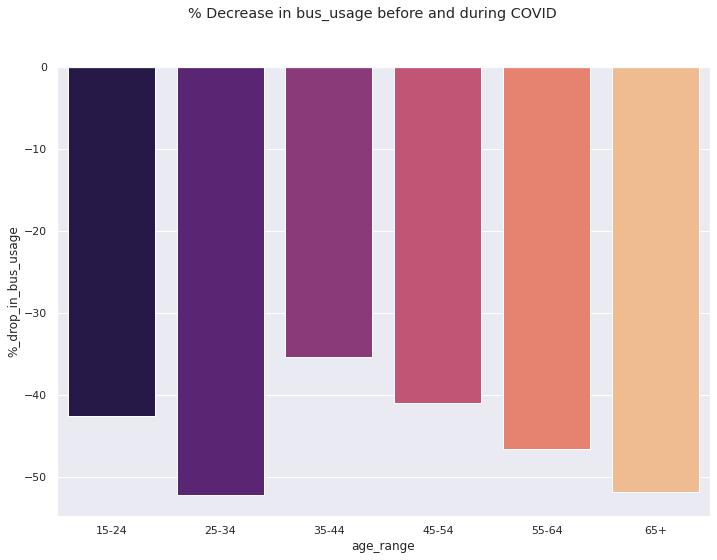

In [18]:
fig = plt.figure()
fig.suptitle('% Decrease in bus_usage before and during COVID')
sns.set_palette('magma')
sns.barplot(x='AgeClassDescription', y='%_drop_in_bus_usage', data = average_decrease_bus_usage)
plt.xlabel('age_range')
plt.ylabel('%_drop_in_bus_usage')
plt.show()

# Interestingly, the age groups that have been most affected by COVID were the young adults between 25-34 as well as seniors
# with drops in bus usage above 50%

#### data_users_senior

In [74]:
def get_senior_data(df):
    df_senior_raw = df[df['AgeClassDescription']=='65+']
    df_senior = df_senior_raw[['County_of_Origin','Period','GenderDescription','Average_BusUsers_per_Day']]
    return df_senior

In [75]:
data_users_senior_covid = get_senior_data(data_users_covid)
data_users_senior_pre = get_senior_data(data_users_pre)

In [78]:
def print_figure_senior(df):
    plt.xticks(rotation='vertical')
    plt.ylim(0,70000)
    sns.barplot(x='County_of_Origin', y='Average_BusUsers_per_Day', hue='GenderDescription', data = df, palette='magma')
    plt.legend(loc=2)

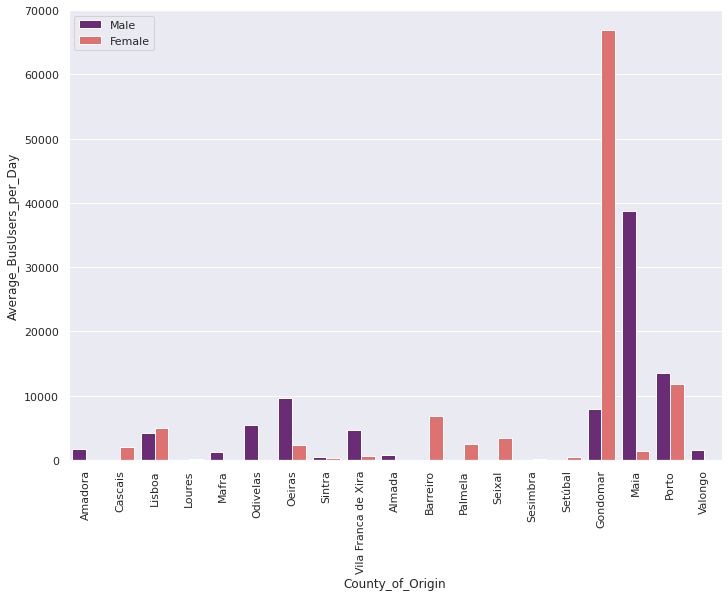

In [79]:
print_figure_senior(data_users_senior_pre)

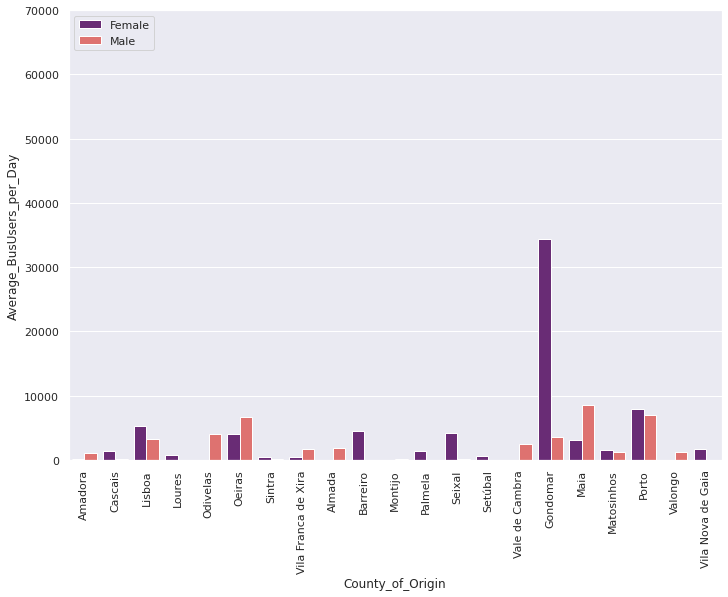

In [80]:
print_figure_senior(data_users_senior_covid)

#### Bus Usage Distinction before and during COVID

In [81]:
data_users_senior_pre

,County_of_Origin,Period,GenderDescription,Average_BusUsers_per_Day
10,Amadora,Sep-19 to Feb-20,Male,1612.85136
16,Cascais,Sep-19 to Feb-20,Female,2017.33398
27,Lisboa,Sep-19 to Feb-20,Female,4955.50375
33,Lisboa,Sep-19 to Feb-20,Male,4116.75536
39,Loures,Sep-19 to Feb-20,Female,147.47484
54,Mafra,Sep-19 to Feb-20,Male,1217.08844
64,Odivelas,Sep-19 to Feb-20,Male,5441.10949
70,Oeiras,Sep-19 to Feb-20,Female,2264.58525
75,Oeiras,Sep-19 to Feb-20,Male,9574.86854
81,Sintra,Sep-19 to Feb-20,Female,341.16600


In [82]:
def get_clean_df(df1, df2):
    df1 = df1.groupby('County_of_Origin').sum()
    df2 = df2.groupby('County_of_Origin').sum()
    df = df1.merge(df2, on = 'County_of_Origin', how = 'left')
    df.rename(columns={"Average_BusUsers_per_Day_x": "average_bus_per_day_pre", "Average_BusUsers_per_Day_y": "average_bus_per_day_cov"}, inplace=True)
    df.reset_index(inplace=True)
    return df

In [83]:
data_users_senior_pre_during = get_clean_df(data_users_senior_pre,data_users_senior_covid)
data_users_senior_pre_during

,County_of_Origin,average_bus_per_day_pre,average_bus_per_day_cov
0,Almada,754.47864,1903.34334
1,Amadora,1612.85136,1165.03726
2,Barreiro,6863.50890,4419.36451
3,Cascais,2017.33398,1363.80012
4,Gondomar,74829.25913,37911.22728
5,Lisboa,9072.25910,8416.24178
6,Loures,147.47484,702.81448
7,Mafra,1217.08844,NaN
8,Maia,40152.82828,11683.68565
9,Odivelas,5441.10949,4068.79843


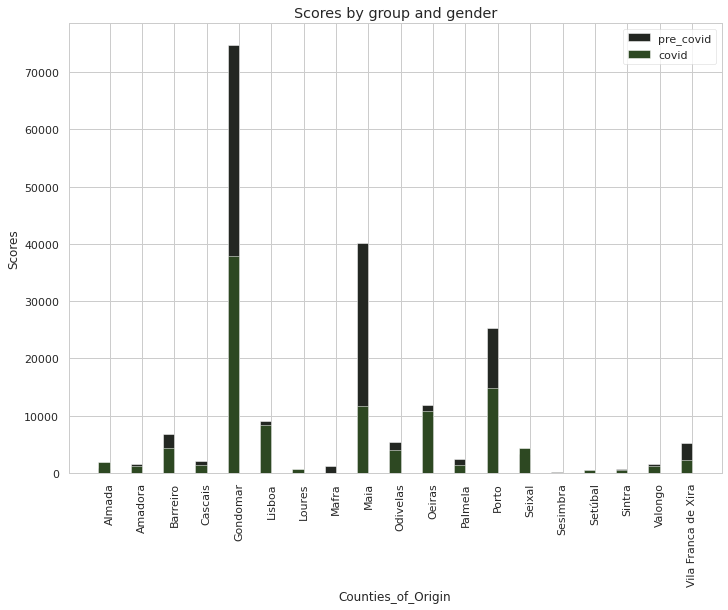

In [155]:
#Checking the drop in Average_BusUsers_per_Day before & After Covid - we can see that some regions such as Gondomar and Matosinhos
#have experienced huge declines

labels = data_users_senior_pre_during['County_of_Origin'].tolist()
x = np.arange(len(labels))
width = 0.35 
fig, ax = plt.subplots()

barPre = ax.bar(x - width/2, data_users_senior_pre_during['average_bus_per_day_pre'], width, label= 'pre_covid')
barCov = ax.bar(x - width/2, data_users_senior_pre_during['average_bus_per_day_cov'], width, label= 'covid')

sns.set_style("whitegrid")
sns.set_palette("dark:#2C2")


ax.set_ylabel('Scores')
ax.set_xlabel('Counties_of_Origin')

ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation='vertical')

plt.show()

#### data_od - not sure how useful this data is

In [96]:
data_od

,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre_ParishCode_of_Public_Transportation,Demand_weight
0,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.30732
1,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110639,0.07000
2,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110658,0.06606
3,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110654,0.05985
4,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110633,0.05234
...,...,...,...,...,...,...,...,...
2248,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,SETÚBAL,ALMADA,150315,0.00000
2249,R2 - AM Porto,Porto,Vila Nova de Gaia,R2 - AM Porto,PORTO,GONDOMAR,130414,0.00000
2250,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,LISBOA,ODIVELAS,111608,0.00000
2251,R2 - AM Porto,Porto,Vila Nova de Gaia,R1 - AM Lisboa,SETÚBAL,ALMADA,150313,0.00000


In [98]:
#unique identifier for each parish 
#It is designated DICOFRE in portuguese, related with de first terms of the words DIstrito, COncelho, FREguesia
#refers to destination
data_od['Dicofre_ParishCode_of_Public_Transportation'].nunique() #100 parishes

100

In [101]:
data_od[['County_of_Origin','Demand_weight']].groupby('County_of_Origin').sum().head()
# The demand weight is normalized per county. 
#This means that the sum of all the demand weights with the same county of origin will be around 1

,Demand_weight
County_of_Origin,
Alcochete,1.00000
Almada,1.00001
Amadora,1.00001
Barreiro,1.00000
Cascais,1.00000


### Demographic Data - PORDATA

In [119]:
def get_data_from_csv(file_name):
    df = pd.read_csv(f'county_data/PORDATA_{file_name}.csv')
    return df

In [123]:
list_of_counties

['Lisboa',
 'Palmela',
 'Oeiras',
 'Vila Franca de Xira',
 'Sintra',
 'Barreiro',
 'Seixal',
 'Almada',
 'Amadora',
 'Mafra',
 'Odivelas',
 'Sesimbra',
 'Maia',
 'Loures',
 'Porto',
 'Gondomar',
 'Setúbal',
 'Cascais',
 'Montijo',
 'Santa Maria da Feira',
 'Matosinhos',
 'Moita',
 'Alcochete']

In [120]:
# population per large age groups in 2011
df_senior_pop = get_data_from_csv('population_per_large_age_groups')
df_senior_pop

,Regions,Total: 2011,0-14,15-64,65+
0,Portugal,"10,562,178","1,572,329","6,979,785","2,010,064"
1,Continente,"10,047,621","1,484,120","6,625,713","1,937,788"
2,Norte,"3,689,682","557,233","2,501,010","631,439"
3,Alto Minho,"244,836","32,514","155,694","56,628"
4,Arcos de Valdevez,"22,847","2,579","13,211","7,057"
...,...,...,...,...,...
348,Santa Cruz,"43,005","8,041","30,634","4,330"
349,Santana,"7,719","1,011","4,882","1,826"
350,São Vicente,"5,723",802,"3,623","1,298"
351,Ilha de Porto Santo,"5,483",818,"3,934",731


In [122]:
# number of seniors per 100 young people
df_aging_index = get_data_from_csv('aging_index')
df_aging_index

,Regions,2001,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Portugal,101.60000,117.80000,121.60000,125.80000,129.40000,133.5,138.60000,143.90000,148.70000,153.20000,157.40000,161.30000
1,Continente,103.80000,120.50000,124.40000,128.60000,132.20000,136.4,141.60000,146.90000,151.70000,156.10000,160.30000,164.10000
2,Norte,79.40000,102.20000,106.80000,111.80000,116.50000,122,128.70000,135.80000,142.90000,149.80000,156.40000,162.70000
3,Alto Minho,131.70000,159.10000,164.20000,170.40000,175.30000,180.4,187.50000,195.20000,203.00000,210.80000,217.40000,223.00000
4,Arcos de Valdevez,208.10000,257.90000,264.10000,270.20000,275.90000,282.9,291.50000,302.20000,312.10000,321.30000,330.50000,337.60000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,Santa Cruz,56.10000,49.40000,50.30000,51.60000,52.80000,54.4,56.30000,58.50000,61.50000,65.00000,68.90000,73.50000
349,Santana,128.10000,169.40000,171.50000,176.80000,186.00000,193.8,203.20000,212.20000,224.00000,236.50000,242.40000,249.60000
350,São Vicente,121.50000,158.30000,160.20000,165.80000,177.20000,189.8,205.80000,217.40000,226.70000,237.30000,247.50000,258.10000
351,Ilha de Porto Santo,57.40000,70.50000,72.90000,75.40000,78.00000,79.6,82.10000,85.00000,87.60000,92.80000,98.50000,103.30000


In [127]:
# dependency_index - where there are more and less elderly people per 100 people of working age
df_dependency_index = get_data_from_csv('early_dependence_index')
df_dependency_index

,Regions,1960,1981,2001,2011
0,Portugal,12.7,18.2,24.2,28.80000
1,Continente,12.8,18.1,24.4,29.20000
2,Norte,11.8,16,20.4,25.20000
3,Alto Minho,16.4,23.7,30.7,36.40000
4,Arcos de Valdevez,17.2,28.4,44.4,53.40000
...,...,...,...,...,...
348,Santa Cruz,11.3,20.5,16.4,14.10000
349,Santana,10.9,18.6,31.7,37.40000
350,São Vicente,11,21.3,32.5,35.80000
351,Ilha de Porto Santo,12.1,12.5,14.5,18.60000


In [132]:
# Single Person Families -  families with only one member / solo living 
# Might impact the ability of moving around on their own
df_SPF = get_data_from_csv('single_person_families')
df_SPF

,Regions,Total: 1981,Total: 2001,Total: 2011,65+ :1981,65+ : 2001,65+ :2011
0,Portugal,"379,245","631,762","866,827","196,978","321,054","406,942"
1,Continente,"366,382","611,627","834,680","190,015","310,860","393,590"
2,Norte,"92,810","159,894","228,923","52,115","84,003","109,884"
3,Alto Minho,"9,160","13,098","17,241","5,446","8,088","9,983"
4,Arcos de Valdevez,"1,636","1,959","2,285","1,025","1,346","1,513"
...,...,...,...,...,...,...,...
348,Santa Cruz,670,"1,067","2,537",399,504,755
349,Santana,315,578,746,157,375,486
350,São Vicente,275,460,555,167,268,318
351,Ilha de Porto Santo,79,185,472,38,67,130


In [137]:
# population per square km
df_pop_density = get_data_from_csv('population_density')
df_pop_density

,Regions,2001,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Portugal,112.5,114.6,114.7,114.5,114,113.4,112.8,112.3,112,111.7,111.5,111.5
1,Continente,110.9,112.9,112.9,112.7,112.3,111.6,111,110.6,110.3,110,109.8,109.9
2,Norte,173.2,174.3,173.8,173.4,172.7,171.7,170.7,169.7,168.9,168.2,167.9,167.9
3,Alto Minho,112.7,111.4,110.9,110.3,109.6,108.7,107.7,106.9,105.9,105,104.4,104
4,Arcos de Valdevez,55.2,52,51.5,51,50.4,49.8,49.2,48.6,48,47.4,47,46.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,Santa Cruz,448.9,505,520.4,528.2,531.4,535.9,538,538.6,539.6,542.6,547,552.3
349,Santana,91.2,83.1,81.6,79.9,78.2,76.8,75.4,74,72.6,71.7,71,70.5
350,São Vicente,76.5,74.1,73.2,71.8,70.5,69.4,68,66.7,65.8,65.4,65.3,65.3
351,Ilha de Porto Santo,112.7,125.6,127.6,127.6,126,125,122.7,121.3,120.3,120.1,120.3,120.6


In [141]:
# Habitants per pharmacy and per doctors
df_healthcare = get_data_from_csv('habitants_per_pharmacy_doctors')
df_healthcare

,Regions,Doctors: 2001,Doctors: 2019,Pharmacists: 2001,Pharmacists: 2019
0,Portugal,311.8,185.6,"1,365.30",742.5
1,Continente,305.2,183.2,"1,328.70",730
2,Norte,351.2,186.2,"1,816.80",871.1
3,Alto Minho,523.2,254.1,"2,381.70",857.6
4,Arcos de Valdevez,"1,234.30",476.1,"4,114.30",837.9
...,...,...,...,...,...
348,Santa Cruz,561.1,326.2,"3,787.60","1,667.10"
349,Santana,"4,374.80","1,346.10","2,916.50","1,346.10"
350,São Vicente,"2,059.50",857.8,"2,059.50","1,286.60"
351,Ilha de Porto Santo,"4,517.50",518.9,"1,129.40","2,594.50"


In [144]:
# Road accidents with victims 
df_road_accidents = get_data_from_csv('road_accidents')
df_road_accidents

,Regions,1987,2019
0,Portugal,x,x
1,Continente,"38,656","35,704"
2,Norte,"12,153","12,850"
3,Alto Minho,862,859
4,Arcos de Valdevez,49,73
...,...,...,...
348,Santa Cruz,x,x
349,Santana,x,x
350,São Vicente,x,x
351,Ilha de Porto Santo,x,x


In [146]:
# Environmental Expenditure - % of environmental expenses out of total expenses 
df_env_exp = get_data_from_csv('environment_expenditure')
df_env_exp

,Regions,2001,2018
0,Portugal,7.9,8.30000
1,Continente,7.8,8.20000
2,Norte,5.9,7.10000
3,Alto Minho,4.9,5.30000
4,Arcos de Valdevez,6.3,5.30000
...,...,...,...
348,Santa Cruz,39.6,18.40000
349,Santana,3.3,2.60000
350,São Vicente,5,10.80000
351,Ilha de Porto Santo,8,5.60000


In [148]:
# Purchasing Power Per Capita
df_purchasing_power = get_data_from_csv('purchasing_power')
df_purchasing_power

,Regions,1993,2017
0,Portugal,100,100
1,Continente,101.8,100.7
2,Norte,81.7,92.1
3,Alto Minho,55.3,79.7
4,Arcos de Valdevez,36.5,67.8
...,...,...,...
348,Santa Cruz,43.3,71.5
349,Santana,30.1,58.3
350,São Vicente,25.6,61
351,Ilha de Porto Santo,50.6,93.5


#### Joining Demographic & WDL Datasets

In [158]:
data_users_senior_pre_during.head()

,County_of_Origin,average_bus_per_day_pre,average_bus_per_day_cov
0,Almada,754.47864,1903.34334
1,Amadora,1612.85136,1165.03726
2,Barreiro,6863.50890,4419.36451
3,Cascais,2017.33398,1363.80012
4,Gondomar,74829.25913,37911.22728


In [161]:
def column_rename(df):
    df.rename(columns = {'Regions': 'County_of_Origin'}, inplace = True)
    return df

In [164]:
df_senior_pop = column_rename(df_senior_pop)

In [165]:
def merge_df(df1,df2):
    df = df1.merge(df2, on = 'County_of_Origin', how = 'right')
    return df

In [172]:
df_population_with_users = merge_df(data_users_senior_pre_during,df_senior_pop)
df_population_with_users[df_population_with_users['County_of_Origin'].isin(list_of_counties)]

,County_of_Origin,average_bus_per_day_pre,average_bus_per_day_cov,Total: 2011,0-14,15-64,65+
33,Gondomar,74829.25913,37911.22728,"168,027","25,845","117,012","25,170"
34,Maia,40152.82828,11683.68565,"135,306","22,776","94,422","18,108"
35,Matosinhos,NaN,NaN,"175,478","25,112","122,081","28,285"
38,Porto,25284.16029,14807.72777,"237,591","28,379","154,129","55,083"
40,Santa Maria da Feira,NaN,NaN,"139,312","22,042","96,647","20,623"
208,Alcochete,NaN,NaN,"17,569","3,332","11,699","2,538"
209,Almada,754.47864,1903.34334,"174,030","25,583","112,722","35,725"
210,Amadora,1612.85136,1165.03726,"175,136","25,903","116,491","32,742"
211,Barreiro,6863.50890,4419.36451,"78,764","11,221","50,532","17,011"
212,Cascais,2017.33398,1363.80012,"206,479","32,655","137,110","36,714"


## Conclusions

### Scalability and Impact
Tell us how applicable and scalable your solution is if you were to implement it in a city. Identify possible limitations and measure the potential social impact of your solution.

### Future Work
Now picture the following scenario: imagine you could have access to any type of data that could help you solve this challenge even better. What would that data be and how would it improve your solution? 🚀